In [10]:
#Shared/Utility scripts
import sys
sys.path.insert(0, '..') #sys allows for the .ipynb file to connect to the shared folder files
import os
import pickle as pkl
import warnings
warnings.filterwarnings("ignore")
#set path directory
HOME = os.path.expanduser('~')
cwd = os.getcwd()

In [11]:
#Put in model of interest for evaluation, NWIS/USGS site id(s), and the start/end date
from shared_scripts import Reach_Eval
model = 'LSTM'  #Modify Reach Eval to support multiple models (i.e NWM, MLP, LSTM1,LSTM2...)
year = 2020
#get NWIS ids from prediction file
with open(f"{HOME}/NWM_ML/Predictions/Hindcast/{model}/{year}/{model}_predictions.pkl", "rb") as f:
    # Decompress data from file
    predictions = pkl.load(f)
NWIS_list = list(predictions.keys())
#plot list of top performing sites
Eval_Metric = 'KGE'
startDT ='2020-1-01'
endDT ='2020-9-20'

Reach_Eval = Reach_Eval.Reach_Eval(model , NWIS_list, startDT, endDT, cwd)

#Get Streamstats and colocated NHD reaches
Reach_Eval.get_NHD_Model_info()

#Get USGS and NWM data
Reach_Eval.prepare_comparison()

Getting geospatial information for NHD reaches


Dropping USGS sites with no NHD reach
Getting  LSTM  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


In [12]:
#Plot the locations
Reach_Eval.Map_Plot_Eval('D', supply = False)

Plotting monitoring station locations


,NWIS_site_id,NHD_reachid,Location,RMSE,MaxError,MAPE,KGE,Drainage_area_mi2,Mean_Basin_Elev_ft,Perc_Forest,Perc_Imperv,Perc_Herbace,Mean_Ann_Precip_in,Ann_low_cfs,Ann_mean_cfs,Ann_hi_cfs
0,10164500,10329013,AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK...,3458,5926,32.853133,0.598114,51.1000,8470.0,71.5,0.01730,3.42,39.4,16.800,53.0,111.8
1,10133650,10276856,"E CANYON CR BL I-80 REST STOP NR PARK CITY, UT",2890,4643,50.049601,0.561293,42.1000,7620.0,65.7,2.80000,3.05,24.1,9.240,19.0,44.6
2,10149000,10349162,"SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT",3110,3819,49.549946,0.548490,15.3000,7600.0,56.0,0.03720,3.78,27.2,19.400,33.0,50.1
3,10140100,10275828,"OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT",4843,9703,57.986120,0.541660,0.0929,6060.0,11.2,0.00000,26.80,30.3,17.000,98.0,313.4
4,10153100,10348934,"HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH",4572,6382,45.240965,0.507152,NaN,NaN,NaN,NaN,NaN,NaN,20.100,39.0,99.9
5,10105900,666170,"LITTLE BEAR RIVER AT PARADISE, UT",15405,21610,54.371393,0.248506,180.0000,6700.0,20.5,0.06530,18.90,33.2,27.800,86.0,199.8
6,10134500,10277268,"EAST CANYON CREEK NEAR MORGAN, UT",10748,20387,48.418876,0.214979,152.0000,7090.0,60.9,1.65000,4.68,25.8,18.700,60.0,148.4
7,10133980,10276712,"EAST CANYON CREEK AB EAST CYN RES NR MORGAN, UTAH",11342,15383,71.686032,0.104441,115.0000,7240.0,65.5,2.13000,3.45,26.4,24.900,46.0,127.4
8,10137500,10274270,"SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT",22945,32057,49.100695,0.097997,137.0000,7220.0,26.3,0.02530,21.90,35.5,32.600,115.0,259.2
9,10171000,10390290,"JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT",30986,50947,65.219361,0.073848,3430.0000,6440.0,41.7,4.37000,6.35,21.4,100.900,138.0,225.2


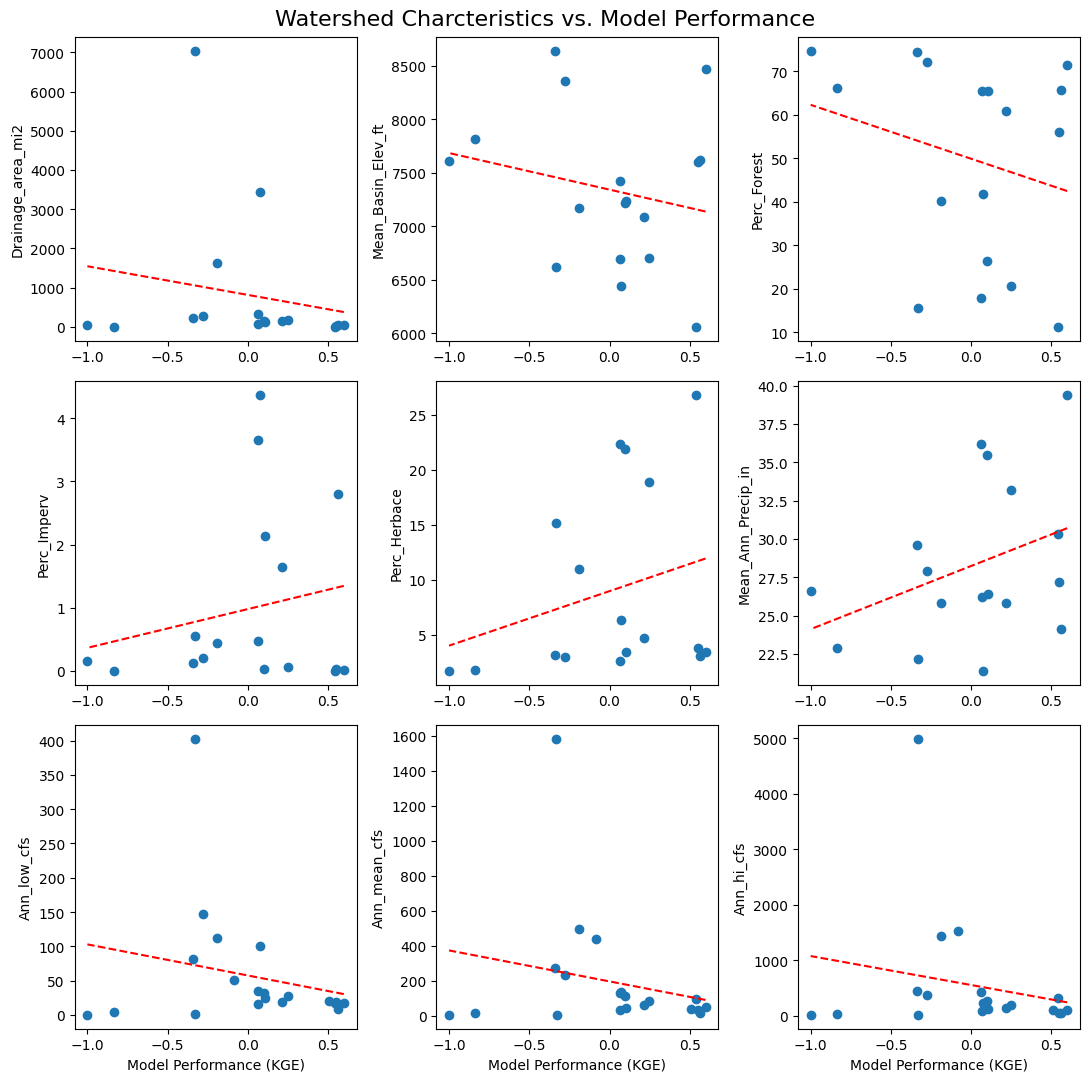

AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK, UT


,USGS: 10164500,LSTM: 10329013
Datetime,,
2020-01-31,795.019815,1098.108985
2020-02-29,1537.203013,2211.109753
2020-03-31,2426.929609,3592.742883
2020-04-30,4018.309825,5175.364068
2020-05-31,9089.445977,7170.085032
2020-06-30,14439.949699,9305.519796
2020-07-31,17520.591150,11594.273182
2020-08-31,18737.158646,13909.295691
2020-09-30,19341.434518,15353.383161


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10164500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10329013 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

E CANYON CR BL I-80 REST STOP NR PARK CITY, UT


,USGS: 10133650,LSTM: 10276856
Datetime,,
2020-01-31,752.027819,269.973138
2020-02-29,1450.434265,529.688106
2020-03-31,3288.410695,931.796442
2020-04-30,4945.897111,1493.141299
2020-05-31,7309.277827,2666.412014
2020-06-30,8609.365265,4154.969761
2020-07-31,9109.560885,5825.978672
2020-08-31,9394.365128,7534.023586
2020-09-30,9570.953550,8586.773283


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133650 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10276856 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT


,USGS: 10149000,LSTM: 10349162
Datetime,,
2020-01-31,1410.438751,400.060890
2020-02-29,2707.459208,860.441335
2020-03-31,4216.186526,1544.722209
2020-04-30,5774.850911,2441.622279
2020-05-31,7373.510392,3644.958471
2020-06-30,8850.221568,5030.797062
2020-07-31,10231.600045,6609.377338
2020-08-31,11623.232276,8227.086764
2020-09-30,12576.348830,9222.443774


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10349162 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT


,USGS: 10140100,LSTM: 10275828
Datetime,,
2020-01-31,654.111754,1429.760934
2020-02-29,1292.842253,2851.574072
2020-03-31,2311.061116,4563.566957
2020-04-30,3778.313796,6479.417036
2020-05-31,7729.757337,8742.744821
2020-06-30,12132.172271,11145.273429
2020-07-31,17578.095488,13768.859879
2020-08-31,25647.000916,16426.654518
2020-09-30,27794.263576,18090.897592


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140100 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10275828 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH


,USGS: 10153100,LSTM: 10348934
Datetime,,
2020-01-31,1686.035423,769.991841
2020-02-29,3437.480931,1576.804402
2020-03-31,5513.541388,2633.657560
2020-04-30,7586.786471,3901.120371
2020-05-31,11713.306019,5486.694322
2020-06-30,13617.793257,7235.386717
2020-07-31,14922.972468,9185.482839
2020-08-31,16289.444359,11173.353424
2020-09-30,17235.696430,12407.280314


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10153100 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10348934 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

LITTLE BEAR RIVER AT PARADISE, UT


,USGS: 10105900,LSTM: 666170
Datetime,,
2020-01-31,2917.602374,1682.488704
2020-02-29,5604.102586,3273.614493
2020-03-31,13180.529383,5171.391393
2020-04-30,23232.459126,7311.038772
2020-05-31,31573.748078,9963.336777
2020-06-30,33573.728193,12758.864543
2020-07-31,34842.559072,15792.495802
2020-08-31,35969.657016,18863.716003
2020-09-30,36777.952975,20796.046589


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10105900 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_666170   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK NEAR MORGAN, UT


,USGS: 10134500,LSTM: 10277268
Datetime,,
2020-01-31,691.063106,1036.282323
2020-02-29,1363.874349,2017.957200
2020-03-31,4295.944332,3230.639938
2020-04-30,10160.557365,4650.642313
2020-05-31,12204.925012,6733.728824
2020-06-30,17304.804364,9041.537635
2020-07-31,24327.103162,11504.085912
2020-08-31,32077.637959,13927.975975
2020-09-30,35792.106764,15404.678579


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10134500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10277268 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK AB EAST CYN RES NR MORGAN, UTAH


,USGS: 10133980,LSTM: 10276712
Datetime,,
2020-01-31,1773.429510,466.557655
2020-02-29,3575.574989,901.763866
2020-03-31,7937.982884,1509.125398
2020-04-30,12847.601736,2341.159385
2020-05-31,18147.410901,3783.335950
2020-06-30,20840.979717,5457.697987
2020-07-31,21926.589593,7313.999223
2020-08-31,22596.829130,9202.194569
2020-09-30,23068.709180,10368.950796


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133980 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10276712 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT


,USGS: 10137500,LSTM: 10274270
Datetime,,
2020-01-31,1955.532783,1862.474232
2020-02-29,3992.262636,3731.577099
2020-03-31,10333.489704,5942.097100
2020-04-30,23711.551409,8210.065013
2020-05-31,38118.379124,11009.420010
2020-06-30,42512.740229,13935.749811
2020-07-31,47127.478667,17048.099192
2020-08-31,51589.263823,20050.267618
2020-09-30,53924.151278,21867.436144


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10137500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10274270 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

JORDAN RIVER @ 1700 SOUTH @ SALT LAKE CITY, UT


,USGS: 10171000,LSTM: 10390290
Datetime,,
2020-01-31,7238.652307,2405.204331
2020-02-29,14086.060777,4742.071455
2020-03-31,20102.674854,7447.916399
2020-04-30,28805.896619,10362.796035
2020-05-31,39346.491793,13746.413221
2020-06-30,49387.180897,17236.889876
2020-07-31,60637.091066,20851.455501
2020-08-31,70970.442375,24461.993092
2020-09-30,77681.368779,26734.856071


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10171000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10390290 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

EAST CANYON CREEK NEAR JEREMY RANCH, UT


,USGS: 10133800,LSTM: 10276836
Datetime,,
2020-01-31,1314.896304,163.329685
2020-02-29,2617.497185,322.975725
2020-03-31,6334.029570,617.956103
2020-04-30,10083.698704,1077.345322
2020-05-31,14191.022555,2156.139199
2020-06-30,16177.839822,3549.793080
2020-07-31,17044.702886,5118.697549
2020-08-31,17565.242472,6722.790480
2020-09-30,17897.063235,7707.648493


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133800 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10276836 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

OGDEN RIVER NR GIBSON AVENUE AT OGDEN, UT


,USGS: 10140700,LSTM: 10274376
Datetime,,
2020-01-31,3178.656033,2053.168003
2020-02-29,16964.802540,3990.740392
2020-03-31,28900.078734,6250.875140
2020-04-30,36538.757915,8753.650394
2020-05-31,44301.017241,12002.909899
2020-06-30,51000.170039,15393.233020
2020-07-31,57660.263480,18983.035498
2020-08-31,65129.916667,22493.021984
2020-09-30,68331.226427,24651.984243


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140700 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10274376 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER NEAR PLAIN CITY, UT


,USGS: 10141000,LSTM: 10273232
Datetime,,
2020-01-31,12061.275203,2782.930399
2020-02-29,34508.457025,5409.142597
2020-03-31,66769.574062,8407.485398
2020-04-30,91441.946325,11753.128667
2020-05-31,97910.994276,15874.266068
2020-06-30,104240.773670,20096.880574
2020-07-31,108541.181853,24444.460370
2020-08-31,111863.213701,28667.762443
2020-09-30,116654.945259,31269.179603


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10141000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10273232 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

WEBER RIVER AT GATEWAY, UT


,USGS: 10136500,LSTM: 10274616
Datetime,,
2020-01-31,3647.653783,2382.237190
2020-02-29,8108.565134,4630.147046
2020-03-31,32163.324226,7206.709219
2020-04-30,60290.113753,10105.597179
2020-05-31,87034.834833,13753.605611
2020-06-30,109331.046522,17533.487405
2020-07-31,132278.632385,21434.425438
2020-08-31,155969.409309,25226.815097
2020-09-30,168472.658031,27556.334402


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10136500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10274616 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT


,USGS: 10155200,LSTM: 10373794
Datetime,,
2020-01-31,7368.352917,1222.743016
2020-02-29,14185.378951,2383.109587
2020-03-31,21548.795003,3767.659208
2020-04-30,30550.912692,5384.965645
2020-05-31,81167.028760,7710.231514
2020-06-30,120696.790634,10199.950037
2020-07-31,138994.531849,12836.375408
2020-08-31,152311.760804,15456.391381
2020-09-30,161697.733605,17074.235208


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155200 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10373794 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SILVER CREEK NEAR SILVER CREEK JUNCTION, UT


,USGS: 10129900,LSTM: 10093082
Datetime,,
2020-01-31,415.848805,211.592598
2020-02-29,840.158528,496.065270
2020-03-31,1788.583214,993.117008
2020-04-30,2352.426958,1735.977968
2020-05-31,2807.549832,2768.354610
2020-06-30,3216.217414,3974.108927
2020-07-31,3454.177210,5362.838167
2020-08-31,3607.989845,6790.118773
2020-09-30,3704.688981,7662.791184


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10129900 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10093082 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

BEAR RIVER NEAR CORINNE, UT


,USGS: 10126000,LSTM: 4605050
Datetime,,
2020-01-31,89206.495168,4022.941145
2020-02-29,181723.304248,7786.020454
2020-03-31,338843.830101,12005.890818
2020-04-30,456117.623388,16411.624168
2020-05-31,531465.098664,22024.539482
2020-06-30,589257.764805,28052.765886
2020-07-31,615152.913974,33908.162991
2020-08-31,630196.486154,39484.075129
2020-09-30,645985.662964,42928.571658


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10126000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_4605050  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

PROVO RIVER NEAR HAILSTONE, UT


,USGS: 10155000,LSTM: 10373622
Datetime,,
2020-01-31,5261.741773,677.643103
2020-02-29,10299.652399,1329.766012
2020-03-31,17949.000150,2171.366020
2020-04-30,34054.570796,3256.033420
2020-05-31,134463.094834,4985.272701
2020-06-30,173327.601455,6871.963688
2020-07-31,176631.665710,8919.406948
2020-08-31,178623.824675,10988.943418
2020-09-30,180350.468222,12269.031062


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155000 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10373622 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

SALT CRK BL NEPHI POWERPLANT DIV NR NEPHI, UT


,USGS: 10145400,LSTM: 10331031
Datetime,,
2020-01-31,615.845438,997.975199
2020-02-29,1137.693371,2017.727135
2020-03-31,1377.143925,3300.009218
2020-04-30,1641.233257,4774.139184
2020-05-31,3420.909666,6572.258701
2020-06-30,4410.971986,8533.758311
2020-07-31,5033.518310,10707.742746
2020-08-31,5461.182010,12921.555566
2020-09-30,5687.696794,14301.863583


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10145400 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10331031 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

DANIELS CREEK AT CHARLESTON, UT


,USGS: 10157500,LSTM: 10375690
Datetime,,
2020-01-31,25.701939,679.706327
2020-02-29,83.741757,1401.091419
2020-03-31,228.798577,2364.590155
2020-04-30,383.055568,3535.308086
2020-05-31,585.009808,5032.224195
2020-06-30,710.835175,6699.425213
2020-07-31,751.713701,8566.417498
2020-08-31,762.729770,10458.603227
2020-09-30,766.056459,11646.480278


:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10157500 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.LSTM_colon_10375690 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I              :Rectangles   [x0,y0,x1,y1]
      .Text.I                    :Text   [x,y]
      .Text.II                   :Text   [x,y]
      .Text.III                  :Text   [x,y]
      .Text.IV                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (LSTM Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [13]:
#Holoviews plots.
freq = 'M'
Reach_Eval.Interactive_Model_Eval(freq, supply =True)